In [1]:
from  transformers  import XLMRobertaModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = XLMRobertaModel.from_pretrained('xlm-roberta-base')
print('Model and Tokenizer Loaded.')

Model and Tokenizer Loaded.


In [1]:
import evaluation.model as md 
model_static_en = md.TextModel('../data/models/crawl-300d-2M.vec')
model_static_fa = md.FastTextModel('../data/models/blogs_skipgram_300_3.bin')


['1999995', '300']


In [ ]:
import csv 
model_map = {'en': model_static_en, 'fa': model_static_fa}
word_map = {'en' : [] , 'fa' : []}
with open('../data/common/crosslingual.csv' , 'r' , encoding='utf8') as f :
    csv_file = csv.reader(f , delimiter=',' , quotechar='"')
    for row in csv_file: 
        print(row)
        word_map[row[0]].append({'word' : row[1], 'sent' : row[2] , 'vec': model_map[row[0]].get_word_vector(row[1])})

        
        

300
300
300
300
(2, 2)


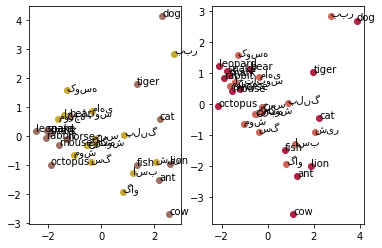

In [24]:
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt

def mapping(x_s, x_t):
    return np.linalg.inv(x_s.transpose().dot(x_s)).dot( x_s.transpose()).dot(x_t) 

def procrustes(A, B):
    """
    Find the best orthogonal matrix mapping using the Orthogonal Procrustes problem
    https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem
    """
    M = B.transpose().dot(A)
    U, S, V_t = np.linalg.svd(M, full_matrices=True)
    return  U.dot(V_t)

pca_map = {}
#plt.subplot(1,2, 1)


def plot_languages(dictionary, src, tgt , convert = True):
    src_vec = get_pca(dictionary, src)
    tgt_vec = get_pca(dictionary, tgt)
    
    W = procrustes(src_vec, tgt_vec)
    print (W.shape)
    x_src = W.dot(src_vec.transpose()).transpose() 
    plt.scatter(tgt_vec[ : , 0] , tgt_vec[ : , 1] , label=lang , color=np.random.rand(3,))
    plt.scatter(x_src[ : , 0] , x_src[ : , 1] , label=lang , color=np.random.rand(3,))

    for ind, dp in enumerate(dictionary[tgt]):
        plt.annotate(dp['word'] , (tgt_vec[ind , 0] , tgt_vec[ind , 1]))

    for ind, dp in enumerate(dictionary[src]):
        plt.annotate(dp['word'] , (x_src[ind , 0] , x_src[ind , 1]))

    return x_src, W 


def get_pca(dictionary ,  lang , n_components = 2): 
    dim = dictionary[lang][0]['vec'].shape[0]
    print(dim)
    x = np.zeros((len(dictionary[lang]), dim))
    for ind, dp in enumerate(dictionary[lang]):
        x[ind , :] = dp['vec']
    pca = PCA(n_components=n_components)
    return pca.fit_transform(x)
     
def plot_all(dictionary):
    for lang,data_list in dictionary.items():
        x_2d = get_pca(word_map ,  lang)  
        plt.scatter(x_2d[ : , 0] , x_2d[ : , 1] , label=lang , color=np.random.rand(3,))
        for ind, dp in enumerate(data_list):
            plt.annotate(dp['word'] , (x_2d[ind , 0] , x_2d[ind , 1]))


plt.subplot(1,2,1) 
plot_all(word_map)
plt.subplot(1,2,2) 
plot_languages(word_map, 'en' , 'fa')

plt.show()
#plt.subplot(1,2,2) 




                 
